# LAB02 Assigment Template




### Exercise 0  Importing the census 

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display  # Allows the use of display() for DataFrames
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler


# Pretty display for notebooks
%matplotlib inline

data = pd.read_csv("census.csv")

data.head()



,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


### Exercise 1  Exploration 

In [3]:
# The total number of records
n_records = data.shape[0]
n_records

45222

In [4]:
# The number of individuals making more than $50000 annually
n_greater_50k = data['income'].value_counts().get('>50K', 0)
n_greater_50k

11208

In [5]:
# The number of individuals making at most $50000 annually
n_at_most_50K = data['income'].value_counts().get('<=50K', 0)
n_at_most_50K

34014

In [6]:
# The percentage of individuals making at more than $50000 annually
greater_percent = data['income'].value_counts(normalize=True).get('<=50K', 0)
greater_percent

0.7521560302507629

### Exercise 2 Preprocessing 

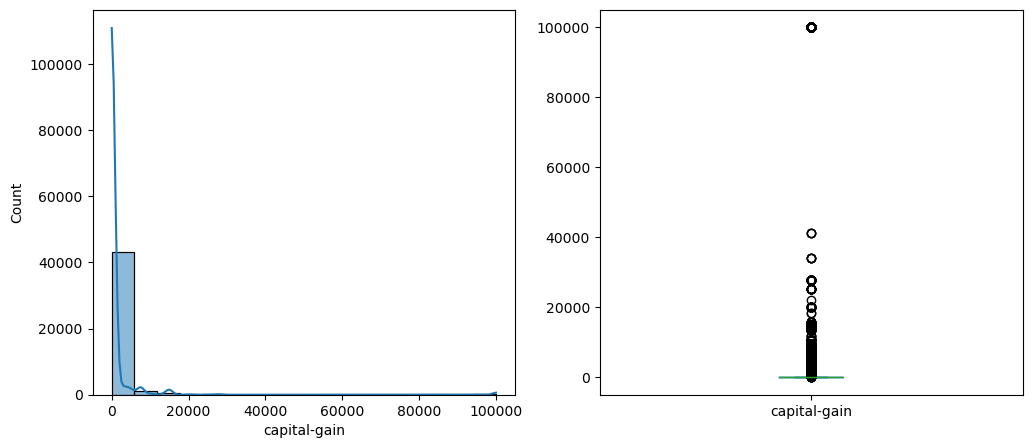

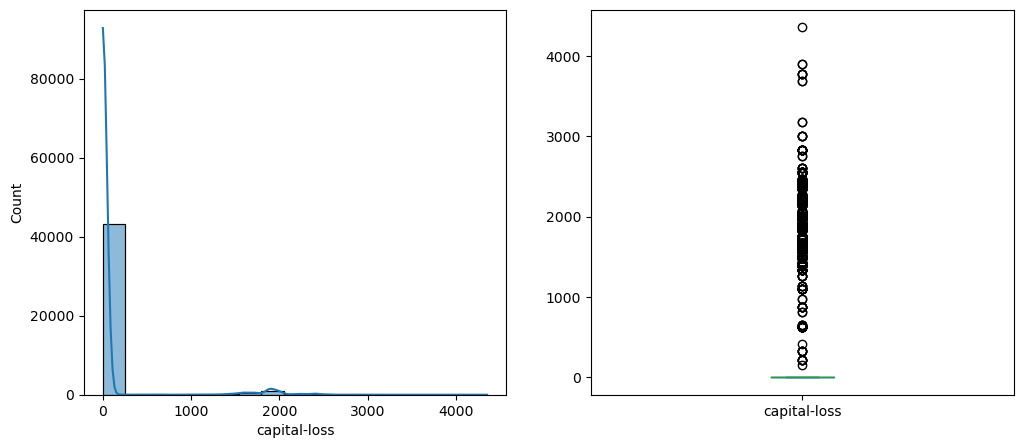

In [7]:
# Visualize skewed continuous features of original data
plt.subplot(121)
sns.histplot(data=data, x='capital-gain', kde=True)

plt.subplot(122)
data['capital-gain'].plot.box(figsize=(12,5))

plt.show()

plt.subplot(121)
sns.histplot(data=data, x='capital-loss', kde = True)

plt.subplot(122)
data['capital-loss'].plot.box(figsize=(12,5))
plt.show()

原数据0的数量远大于其他数据的量，为了更好处理数据分布，给数据增加两列，分别记录数据是否为0

在下面的统计中，只考虑非0数据的分布

由图可以看出，非0数据依然不符合正态分布，我们再将这些数据取对数变换

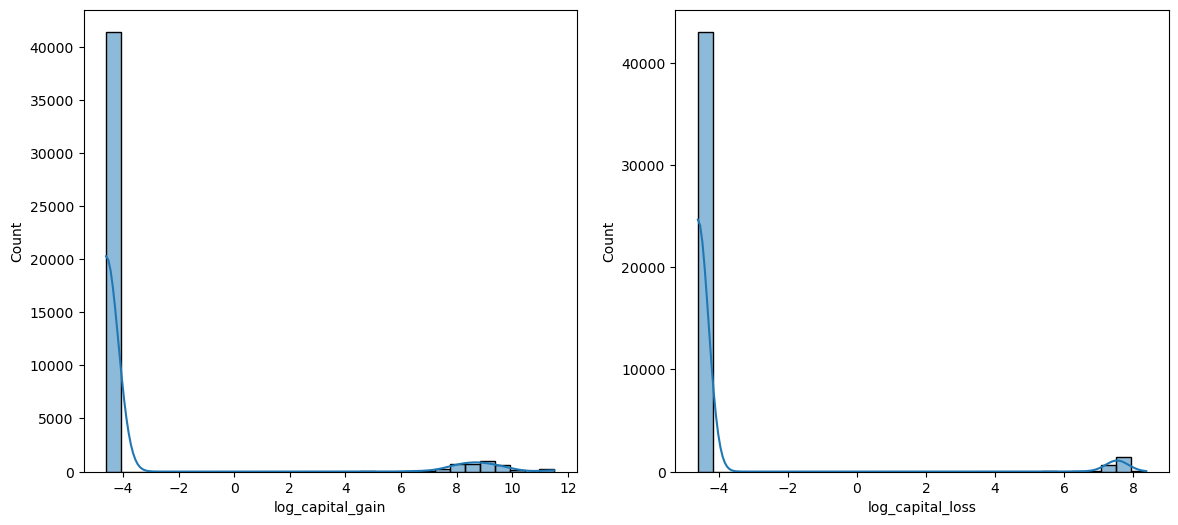

In [8]:
# 给原数据加上一点很小的量再做取对数操作
data['log_capital_gain'] = np.log(data['capital-gain']+0.01)
data['log_capital_loss'] = np.log(data['capital-loss']+0.01)  

plt.figure(figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=data, x='log_capital_gain', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=data, x='log_capital_loss', bins=30, kde=True)

plt.show()

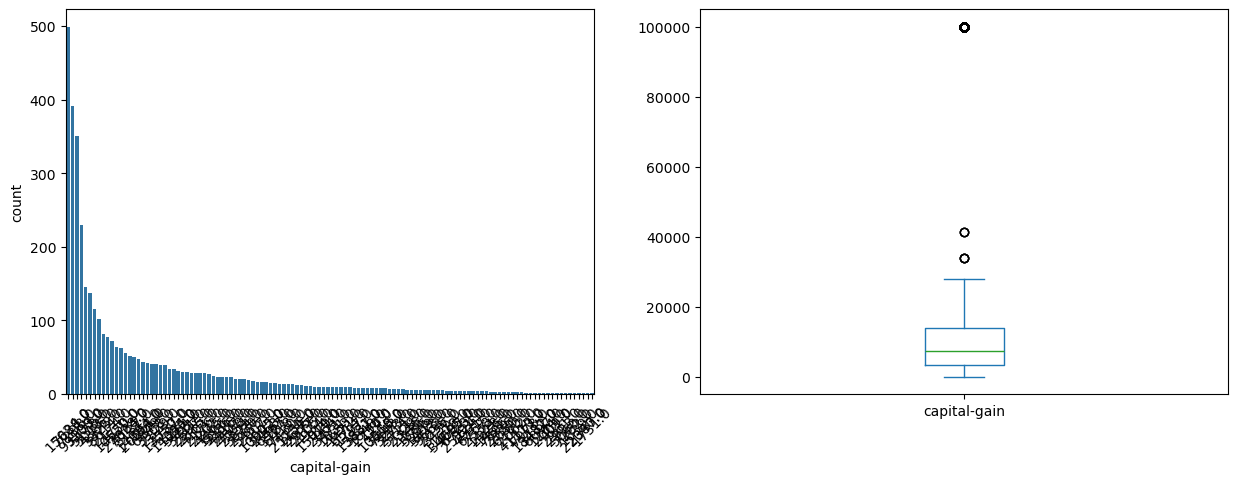

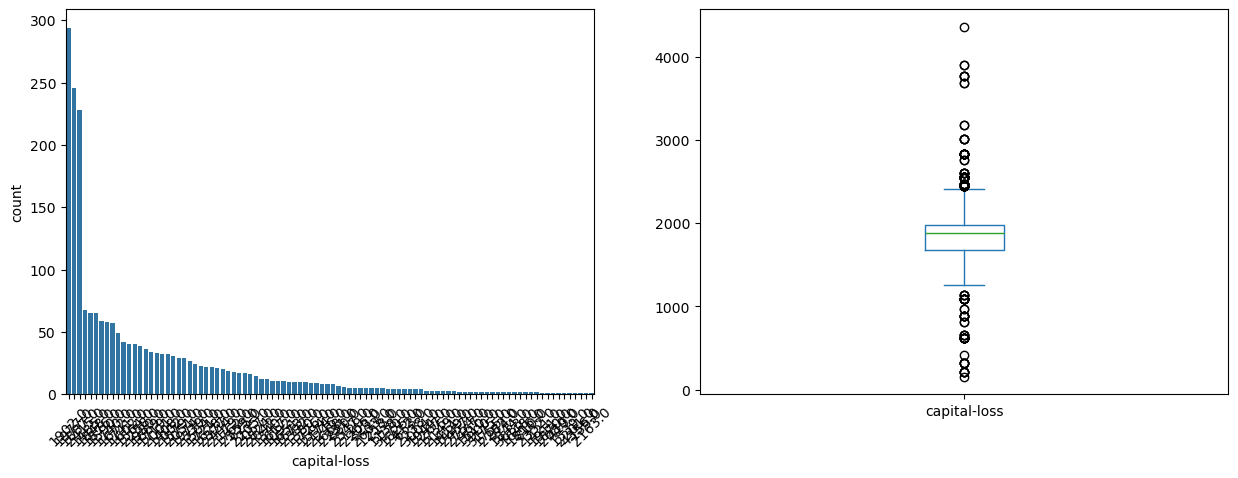

d:\Program\anaconda\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


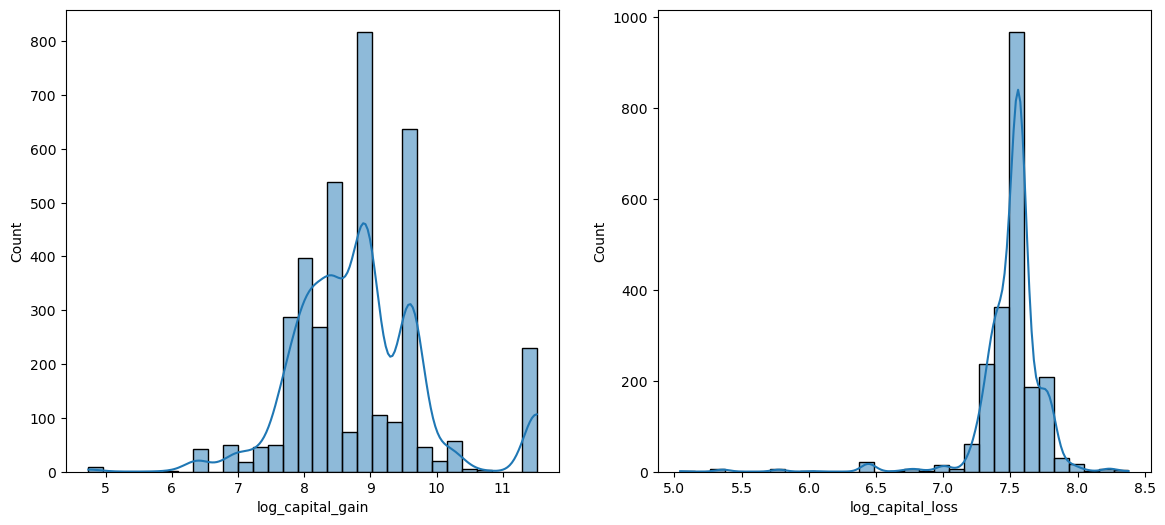

In [9]:
# Outliers Treatment

# 创建两个新的列，分别表示 capital-gain 和 capital-loss 是否为零
# data['is_zero_capital_gain'] = (data['capital-gain'] == 0).astype(int)
# data['is_zero_capital_loss'] = (data['capital-loss'] == 0).astype(int)

# 绘制两个新列的非零数据的频率
non_zero_gain = data[data['capital-gain'] > 0]
non_zero_loss = data[data['capital-loss'] > 0]


plt.subplot(1, 2, 1)
sns.countplot(data=non_zero_gain, x='capital-gain', order=non_zero_gain['capital-gain'].value_counts().index)
plt.xticks(rotation=45)

plt.subplot(122)
non_zero_gain['capital-gain'].plot.box(figsize=(15,5))
plt.show()

plt.subplot(1, 2, 1)
sns.countplot(data=non_zero_loss, x='capital-loss', order=non_zero_loss['capital-loss'].value_counts().index)
plt.xticks(rotation=45)

plt.subplot(122)
non_zero_loss['capital-loss'].plot.box(figsize=(15,5))

plt.show()

# 对数变换
log_data=data.copy()
log_data['log_capital_gain'] = np.log(data['capital-gain'])
log_data['log_capital_loss'] = np.log(data['capital-loss'])  

plt.figure(figsize=(14, 6))

plt.subplot(121)
sns.histplot(data=log_data, x='log_capital_gain', bins=30, kde=True)
plt.subplot(122)
sns.histplot(data=log_data, x='log_capital_loss', bins=30, kde=True)

plt.show()

In [10]:
# Data Transformation
from sklearn.preprocessing import MinMaxScaler
model = MinMaxScaler()
data1=data.copy()
numeral = ['capital-gain','capital-loss','age','education-num']
Min_Max_numeral = ['capital-gain','capital-loss','age','education-num']
data1[Min_Max_numeral] = model.fit_transform(data1[numeral])
data1.head()

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,log_capital_gain,log_capital_loss
0,0.301370,State-gov,Bachelors,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.02174,0.0,40.0,United-States,<=50K,7.684329,-4.60517
1,0.452055,Self-emp-not-inc,Bachelors,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.00000,0.0,13.0,United-States,<=50K,-4.605170,-4.60517
2,0.287671,Private,HS-grad,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.00000,0.0,40.0,United-States,<=50K,-4.605170,-4.60517
3,0.493151,Private,11th,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.00000,0.0,40.0,United-States,<=50K,-4.605170,-4.60517
4,0.150685,Private,Bachelors,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.00000,0.0,40.0,Cuba,<=50K,-4.605170,-4.60517


In [11]:
data.dtypes

age                   int64
workclass            object
education_level      object
education-num       float64
marital-status       object
occupation           object
relationship         object
race                 object
sex                  object
capital-gain        float64
capital-loss        float64
hours-per-week      float64
native-country       object
income               object
log_capital_gain    float64
log_capital_loss    float64
dtype: object

In [12]:
# Perform one-hot encoding on the data
from sklearn.preprocessing import LabelEncoder
data_one_hot = data1.copy()
data_one_hot[numeral] = StandardScaler().fit_transform(data_one_hot[numeral])
data_one_hot = pd.get_dummies(data_one_hot, columns=['workclass','native-country','education_level','occupation','relationship','sex','race','income','marital-status'],drop_first=True,dtype=int)
# data_one_hot['marital-status'] = LabelEncoder().fit_transform(data_one_hot['marital-status'])
# data_one_hot['workclass'] = LabelEncoder().fit_transform(data_one_hot['workclass'])
# data_one_hot['education_level'] = LabelEncoder().fit_transform(data_one_hot['education_level'])
# data_one_hot['occupation'] = LabelEncoder().fit_transform(data_one_hot['occupation'])
# data_one_hot['relationship'] = LabelEncoder().fit_transform(data_one_hot['relationship'])
# data_one_hot['native-country'] = LabelEncoder().fit_transform(data_one_hot['native-country'])
data_one_hot.head(10)


,age,education-num,capital-gain,capital-loss,hours-per-week,log_capital_gain,log_capital_loss,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,race_ Black,race_ Other,race_ White,income_>50K,marital-status_ Married-AF-spouse,marital-status_ Married-civ-spouse,marital-status_ Married-spouse-absent,marital-status_ Never-married,marital-status_ Separated,marital-status_ Widowed
0,0.034201,1.128753,0.142888,-0.21878,40.0,7.684329,-4.60517,0,0,0,...,0,0,1,0,0,0,0,1,0,0
1,0.866417,1.128753,-0.146733,-0.21878,13.0,-4.605170,-4.60517,0,0,0,...,0,0,1,0,0,1,0,0,0,0
2,-0.041455,-0.438122,-0.146733,-0.21878,40.0,-4.605170,-4.60517,0,1,0,...,0,0,1,0,0,0,0,0,0,0
3,1.093385,-1.221559,-0.146733,-0.21878,40.0,-4.605170,-4.60517,0,1,0,...,1,0,0,0,0,1,0,0,0,0
4,-0.798015,1.128753,-0.146733,-0.21878,40.0,-4.605170,-4.60517,0,1,0,...,1,0,0,0,0,1,0,0,0,0
5,-0.117111,1.520471,-0.146733,-0.21878,40.0,-4.605170,-4.60517,0,1,0,...,0,0,1,0,0,1,0,0,0,0
6,0.790761,-2.004996,-0.146733,-0.21878,16.0,-4.605170,-4.60517,0,1,0,...,1,0,0,0,0,0,1,0,0,0
7,1.017729,-0.438122,-0.146733,-0.21878,45.0,-4.605170,-4.60517,0,0,0,...,0,0,1,1,0,1,0,0,0,0
8,-0.571047,1.520471,1.729546,-0.21878,50.0,9.552795,-4.60517,0,1,0,...,0,0,1,1,0,0,0,1,0,0
9,0.261169,1.128753,0.543083,-0.21878,40.0,8.552176,-4.60517,0,1,0,...,0,0,1,1,0,1,0,0,0,0


In [13]:
data_one_hot.dtypes

age                                      float64
education-num                            float64
capital-gain                             float64
capital-loss                             float64
hours-per-week                           float64
                                          ...   
marital-status_ Married-civ-spouse         int32
marital-status_ Married-spouse-absent      int32
marital-status_ Never-married              int32
marital-status_ Separated                  int32
marital-status_ Widowed                    int32
Length: 98, dtype: object

### Exercise 3 Shuffle and Split Data

In [14]:
# Split the 'feature' and 'income' data into training and testing sets
from sklearn.model_selection import train_test_split
Y = data_one_hot['income_>50K']
X = data_one_hot.drop('income_>50K', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,Y,train_size=0.8, random_state =0)

print("The shape of X_train is:", X_train.shape)
print("The shape of X_test is:", X_test.shape)

print('')
print("The shape of y_train is:", y_train.shape)
print("The shape of y_test is:", y_test.shape)

The shape of X_train is: (36177, 97)
The shape of X_test is: (9045, 97)

The shape of y_train is: (36177,)
The shape of y_test is: (9045,)


### Exercise 4 Evaluating Model
The following are some of the supervised learning models that are currently available in `scikit-learn`:
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, RandomForest)
- K-Nearest Neighbors
- Support Vector Machines (SVM)
- Logistic Regression
You need choose three of them, draw three ROC curves on the census data, and analyze and compare the them.

In [15]:
# Evaluating Model
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_curve, auc

# 决策树分类 81%
model = DecisionTreeClassifier()
model.fit(X_train,y_train) 
y_prediction = model.predict(X_test) 
print('Decision Tree accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# # 逻辑回归 84%
# model = LogisticRegression() 
# model.fit(X_train,y_train) 
# y_prediction = model.predict(X_test) 
# print('Logistic Regression accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# # 随机森林 84%
# model = RandomForestClassifier()
# model.fit(X_train,y_train) 
# y_prediction = model.predict(X_test) 
# print('Random Forest accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# # KNN 82%
# model = KNeighborsClassifier()
# model.fit(X_train,y_train) 
# y_prediction = model.predict(X_test) 
# print('KNeighbor accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# # 高斯 61%
# model = GaussianNB()
# model.fit(X_train,y_train) 
# y_prediction = model.predict(X_test) 
# print('Gaussian accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# # 线性 83%
# model = LinearSVC() 
# model.fit(X_train,y_train) 
# y_prediction = model.predict(X_test) 
# print('Linear accuracy = ', metrics.accuracy_score(y_prediction,y_test))

# 计算准确性和 F-score
accuracy = accuracy_score(y_test, y_prediction)
f_score = f1_score(y_test, y_prediction)

print(f'Constant Model Accuracy: {accuracy:.4f}')
print(f'Constant Model F-score: {f_score:.4f}')

Decision Tree accuracy =  0.8162520729684909
Constant Model Accuracy: 0.8163
Constant Model F-score: 0.6199


### Exercise 5 Evaluating Model 

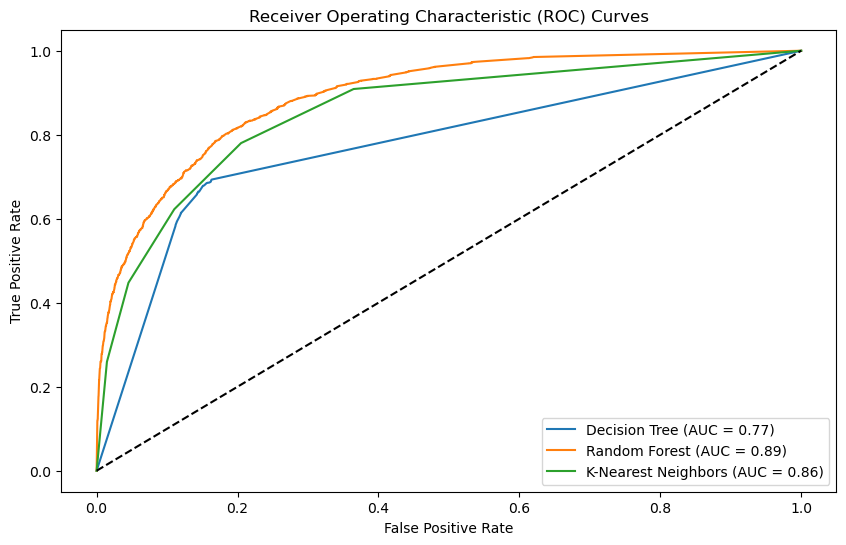

In [16]:
from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = model.predict_proba(X_test)#Return probability estimates for the test vector X.
threshold = 0.8
y_pred_class = y_pred[:, 1]   > threshold
tn, fp, fn, tp = confusion_matrix(y_test, y_pred_class).ravel()
accuracy = (tp + tn) / (tp + fp + fn + tn)

# Or simply
accuracy_score(y_test, y_pred_class)

# fper, tper, thresholds = metrics.roc_curve(y_test, y_pred[:, 1]) 
# plt.plot(fper, tper, color='orange', label='ROC')
# plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('Receiver Operating Characteristic (ROC) Curve')
# plt.legend()
# plt.show()

models = {
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'K-Nearest Neighbors': KNeighborsClassifier()
}

plt.figure(figsize=(10, 6))

for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]  # 获取预测概率
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()